In [28]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd 
import seaborn as sns


from sklearn.metrics import mean_squared_error
import os

import warnings

In [29]:
def exponential_smoothing(series, alpha):
    result = [series[0]] 
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return result


In [30]:
# сделаем функцию
def split_data( data, split_date ):
    return data.loc[data.index.get_level_values('Date') <= split_date].copy(), \
           data.loc[data.index.get_level_values('Date') >  split_date].copy()

In [31]:
Path_Energy = 'my_PJME_MW.csv'
data = pd.read_csv(Path_Energy, index_col=[0], parse_dates=[0])

data.head()

,Time,PJME_MW,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,hour,is_holiday,is_prev_holiday,is_next_holiday
Date,,,,,,,,,,,,,
2002-01-01,01:00:00,30393.0,2002,1,1,1,1,1,1,1,1,0,0
2002-01-01,02:00:00,29265.0,2002,1,1,1,1,1,1,2,1,0,0
2002-01-01,03:00:00,28357.0,2002,1,1,1,1,1,1,3,1,0,0
2002-01-01,04:00:00,27899.0,2002,1,1,1,1,1,1,4,1,0,0
2002-01-01,05:00:00,28057.0,2002,1,1,1,1,1,1,5,1,0,0


In [122]:
data.copy().resample('W').sum().shape

(866, 12)

In [32]:
data_w = data.copy().resample('W').sum()
data_w.head()

,PJME_MW,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,hour,is_holiday,is_prev_holiday,is_next_holiday
Date,,,,,,,,,,,,
2002-01-06,4632079.0,286286,143,503,143,503,143,503,1656,23,0,24
2002-01-13,5289881.0,336336,168,1680,168,1680,336,504,1932,0,0,0
2002-01-20,5284084.0,336336,168,2856,168,2856,504,504,1932,0,24,0
2002-01-27,5063777.0,336336,168,4032,168,4032,672,504,1932,24,0,24
2002-02-03,4905010.0,336336,240,2976,168,5208,840,504,1932,0,0,0


In [33]:
data_w.drop('hour', axis=1,inplace=True)
data_w.head()

,PJME_MW,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,is_holiday,is_prev_holiday,is_next_holiday
Date,,,,,,,,,,,
2002-01-06,4632079.0,286286,143,503,143,503,143,503,23,0,24
2002-01-13,5289881.0,336336,168,1680,168,1680,336,504,0,0,0
2002-01-20,5284084.0,336336,168,2856,168,2856,504,504,0,24,0
2002-01-27,5063777.0,336336,168,4032,168,4032,672,504,24,0,24
2002-02-03,4905010.0,336336,240,2976,168,5208,840,504,0,0,0


In [34]:
data_w.drop('is_holiday', axis=1,inplace=True)
data_w.head()

,PJME_MW,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,is_prev_holiday,is_next_holiday
Date,,,,,,,,,,
2002-01-06,4632079.0,286286,143,503,143,503,143,503,0,24
2002-01-13,5289881.0,336336,168,1680,168,1680,336,504,0,0
2002-01-20,5284084.0,336336,168,2856,168,2856,504,504,24,0
2002-01-27,5063777.0,336336,168,4032,168,4032,672,504,0,24
2002-02-03,4905010.0,336336,240,2976,168,5208,840,504,0,0


In [35]:
data_w.drop('is_prev_holiday', axis=1,inplace=True)
data_w.head()

,PJME_MW,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,is_next_holiday
Date,,,,,,,,,
2002-01-06,4632079.0,286286,143,503,143,503,143,503,24
2002-01-13,5289881.0,336336,168,1680,168,1680,336,504,0
2002-01-20,5284084.0,336336,168,2856,168,2856,504,504,0
2002-01-27,5063777.0,336336,168,4032,168,4032,672,504,24
2002-02-03,4905010.0,336336,240,2976,168,5208,840,504,0


In [36]:
data_w.drop('is_next_holiday', axis=1,inplace=True)
data_w.head()

,PJME_MW,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek
Date,,,,,,,,
2002-01-06,4632079.0,286286,143,503,143,503,143,503
2002-01-13,5289881.0,336336,168,1680,168,1680,336,504
2002-01-20,5284084.0,336336,168,2856,168,2856,504,504
2002-01-27,5063777.0,336336,168,4032,168,4032,672,504
2002-02-03,4905010.0,336336,240,2976,168,5208,840,504


In [37]:
data_w.drop('dayofweek', axis=1,inplace=True)
data_w.head()

,PJME_MW,year,month,dayofmonth,quarter,dayofyear,weekofyear
Date,,,,,,,
2002-01-06,4632079.0,286286,143,503,143,503,143
2002-01-13,5289881.0,336336,168,1680,168,1680,336
2002-01-20,5284084.0,336336,168,2856,168,2856,504
2002-01-27,5063777.0,336336,168,4032,168,4032,672
2002-02-03,4905010.0,336336,240,2976,168,5208,840


In [40]:
data_w['t'] = 0.0
data_w.iloc[1:,7]=data_w.iloc[:-1,0].values
data_w['t1']=0.0
data_w.iloc[2:,8]=data_w.iloc[:-2,0].values
data_w['t2']=0.0
data_w.iloc[3:,9]=data_w.iloc[:-3,0].values
data_w.fillna(0)
data_w['t3']=0.0
data_w.iloc[4:,10]=data_w.iloc[:-4,0].values
data_w.fillna(0)

data_w.fillna(0)

data_w.head(15)

,PJME_MW,year,month,dayofmonth,quarter,dayofyear,weekofyear,t,t1,t2,t3
Date,,,,,,,,,,,
2002-01-06,4632079.0,286286,143,503,143,503,143,0.0,0.0,0.0,0.0
2002-01-13,5289881.0,336336,168,1680,168,1680,336,4632079.0,0.0,0.0,0.0
2002-01-20,5284084.0,336336,168,2856,168,2856,504,5289881.0,4632079.0,0.0,0.0
2002-01-27,5063777.0,336336,168,4032,168,4032,672,5284084.0,5289881.0,4632079.0,0.0
2002-02-03,4905010.0,336336,240,2976,168,5208,840,5063777.0,5284084.0,5289881.0,4632079.0
2002-02-10,5233287.0,336336,336,1176,168,6384,1008,4905010.0,5063777.0,5284084.0,5289881.0
2002-02-17,5143583.0,336336,336,2352,168,7560,1176,5233287.0,4905010.0,5063777.0,5284084.0
2002-02-24,4896214.0,336336,336,3528,168,8736,1344,5143583.0,5233287.0,4905010.0,5063777.0
2002-03-03,5017994.0,336336,408,2688,168,9912,1512,4896214.0,5143583.0,5233287.0,4905010.0


In [42]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE 
from sklearn.decomposition import PCA
import seaborn as sns

scl=StandardScaler()
tsne_ =TSNE(n_components=2)
pca_ =PCA(n_components=2)

X = data_w.iloc[:,:].values

Xscale = scl.fit_transform(X)
X_t = tsne_.fit_transform(Xscale)
X_p = pca_.fit_transform(Xscale)

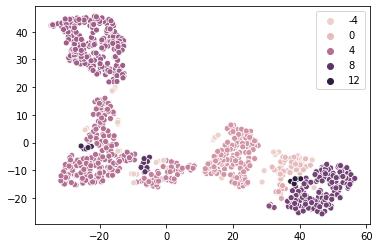

In [99]:
clast_0 = DBSCAN(eps=2, leaf_size=1)
clast_1 = DBSCAN(eps=1, leaf_size=1)
X_clast =clast_0.fit_predict(X_t)
X_scale_clast =clast_1.fit_predict(Xscale)

sns.scatterplot(X_t[:,0],X_t[:,1], hue=X_clast)
plt.show()

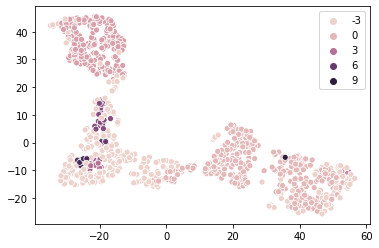

In [100]:
sns.scatterplot(X_t[:,0],X_t[:,1], hue=X_scale_clast )
plt.show()

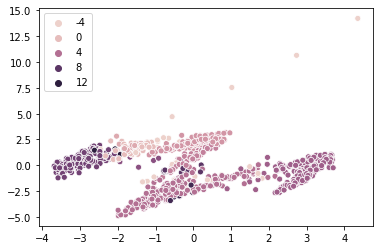

In [101]:
sns.scatterplot(X_p[:,0],X_p[:,1], hue=X_clast)
plt.show()

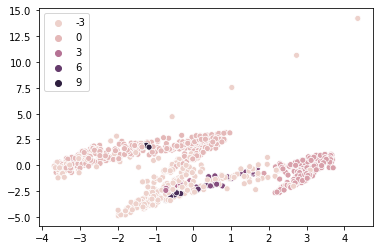

In [102]:
sns.scatterplot(X_p[:,0],X_p[:,1], hue=X_scale_clast)
plt.show()

In [103]:
print('Число кластеров в календаре с масштабированием: ',len(np.unique(X_scale_clast)))
print('Число кластеров в календаре: ',len(np.unique(X_clast)))

Число кластеров в календаре с масштабированием:  10
Число кластеров в календаре:  12


In [106]:
data_w['wmy'] = X_clast
data_w.head()

,PJME_MW,year,month,dayofmonth,quarter,dayofyear,weekofyear,t,t1,t2,t3,wmy
Date,,,,,,,,,,,,
2002-01-06,4632079.0,286286,143,503,143,503,143,0.0,0.0,0.0,0.0,-1
2002-01-13,5289881.0,336336,168,1680,168,1680,336,4632079.0,0.0,0.0,0.0,-1
2002-01-20,5284084.0,336336,168,2856,168,2856,504,5289881.0,4632079.0,0.0,0.0,-1
2002-01-27,5063777.0,336336,168,4032,168,4032,672,5284084.0,5289881.0,4632079.0,0.0,-1
2002-02-03,4905010.0,336336,240,2976,168,5208,840,5063777.0,5284084.0,5289881.0,4632079.0,0


In [107]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, svd_solver='full')
Xpca=pca.fit_transform(Xscale[:,1:-1])
Xpca.shape

(866, 2)

In [109]:
data_w['pca1']=Xpca[:,0]
data_w['pca2']=Xpca[:,1]

In [110]:
data_w.head()

,PJME_MW,year,month,dayofmonth,quarter,dayofyear,weekofyear,t,t1,t2,t3,wmy,pca1,pca2
Date,,,,,,,,,,,,,,
2002-01-06,4632079.0,286286,143,503,143,503,143,0.0,0.0,0.0,0.0,-1,-1.916271,13.895165
2002-01-13,5289881.0,336336,168,1680,168,1680,336,4632079.0,0.0,0.0,0.0,-1,-1.991574,9.548811
2002-01-20,5284084.0,336336,168,2856,168,2856,504,5289881.0,4632079.0,0.0,0.0,-1,-2.405891,5.139408
2002-01-27,5063777.0,336336,168,4032,168,4032,672,5284084.0,5289881.0,4632079.0,0.0,-1,-2.824527,1.026172
2002-02-03,4905010.0,336336,240,2976,168,5208,840,5063777.0,5284084.0,5289881.0,4632079.0,0,-2.766428,0.728963


In [112]:
first_diff =np.array(data_w.iloc[1:,0].values - data_w.iloc[:-1,0].values).astype('float32') 
data_w['diff1'] = 0.0
data_w['diff1'] =  data_w['diff1'].astype('float') 
data_w['diff1'].values[1:] = first_diff

In [113]:
data_w.head()

,PJME_MW,year,month,dayofmonth,quarter,dayofyear,weekofyear,t,t1,t2,t3,wmy,pca1,pca2,diff1
Date,,,,,,,,,,,,,,,
2002-01-06,4632079.0,286286,143,503,143,503,143,0.0,0.0,0.0,0.0,-1,-1.916271,13.895165,0.0
2002-01-13,5289881.0,336336,168,1680,168,1680,336,4632079.0,0.0,0.0,0.0,-1,-1.991574,9.548811,657802.0
2002-01-20,5284084.0,336336,168,2856,168,2856,504,5289881.0,4632079.0,0.0,0.0,-1,-2.405891,5.139408,-5797.0
2002-01-27,5063777.0,336336,168,4032,168,4032,672,5284084.0,5289881.0,4632079.0,0.0,-1,-2.824527,1.026172,-220307.0
2002-02-03,4905010.0,336336,240,2976,168,5208,840,5063777.0,5284084.0,5289881.0,4632079.0,0,-2.766428,0.728963,-158767.0


In [233]:
first_diff

array([ 6.578020e+05, -5.797000e+03, -2.203070e+05, -1.587670e+05,
        3.282770e+05, -8.970400e+04, -2.473690e+05,  1.217800e+05,
       -7.192100e+04, -1.290460e+05,  2.107910e+05, -3.917120e+05,
        9.146000e+04, -1.609090e+05,  7.227370e+05, -7.001570e+05,
       -6.508400e+04,  1.104790e+05,  3.316000e+03, -2.123800e+04,
        6.666650e+05, -8.179300e+04,  2.490590e+05,  1.733300e+04,
        1.127289e+06, -1.059850e+05, -7.169460e+05,  8.925270e+05,
       -5.359540e+05,  1.156908e+06, -1.412145e+06,  1.444332e+06,
       -8.440770e+05, -1.300063e+06,  1.240490e+05,  1.672760e+05,
        8.974700e+04, -6.436570e+05,  3.038430e+05, -5.590650e+05,
       -3.524200e+04,  7.812400e+04,  3.074390e+05, -1.313370e+05,
       -2.288000e+04,  2.109010e+05, -3.209800e+04,  7.135810e+05,
       -9.916600e+04, -1.897860e+05, -2.672130e+05,  2.540500e+04,
        3.345590e+05,  4.995840e+05,  1.965600e+05, -3.160310e+05,
       -2.926120e+05,  3.338020e+05, -4.217020e+05,  1.498030e

In [234]:
data_w.iloc[1:,0].values

array([5289881. , 5284084. , 5063777. , 4905010. , 5233287. , 5143583. ,
       4896214. , 5017994. , 4946073. , 4817027. , 5027818. , 4636106. ,
       4727566. , 4566657. , 5289394. , 4589237. , 4524153. , 4634632. ,
       4637948. , 4616710. , 5283375. , 5201582. , 5450641. , 5467974. ,
       6595263. , 6489278. , 5772332. , 6664859. , 6128905. , 7285813. ,
       5873668. , 7318000. , 6473923. , 5173860. , 5297909. , 5465185. ,
       5554932. , 4911275. , 5215118. , 4656053. , 4620811. , 4698935. ,
       5006374. , 4875037. , 4852157. , 5063058. , 5030960. , 5744541. ,
       5645375. , 5455589. , 5188376. , 5213781. , 5548340. , 6047924. ,
       6244484. , 5928453. , 5635841. , 5969643. , 5547941. , 5697744. ,
       5489138. , 5286950. , 4787713. , 4687507. , 4890218. , 5051031. ,
       4594954. , 4572881. , 4570797. , 4627934. , 4572087. , 4557119. ,
       4501352. , 4640027. , 5427375. , 4915562. , 6260382. , 6147682. ,
       6176609. , 5919031. , 6310732. , 6083254. , 

In [114]:
first_diff_w =(first_diff) / data_w.iloc[1:,0].values
data_w['diff1_d'] = 0.0
data_w['diff1_d'] =  data_w['diff1_d'].astype('float') 
data_w['diff1_d'].values[1:] = np.array(first_diff_w).astype('float32')

In [115]:
data_w.head()

,PJME_MW,year,month,dayofmonth,quarter,dayofyear,weekofyear,t,t1,t2,t3,wmy,pca1,pca2,diff1,diff1_d
Date,,,,,,,,,,,,,,,,
2002-01-06,4632079.0,286286,143,503,143,503,143,0.0,0.0,0.0,0.0,-1,-1.916271,13.895165,0.0,0.000000
2002-01-13,5289881.0,336336,168,1680,168,1680,336,4632079.0,0.0,0.0,0.0,-1,-1.991574,9.548811,657802.0,0.124351
2002-01-20,5284084.0,336336,168,2856,168,2856,504,5289881.0,4632079.0,0.0,0.0,-1,-2.405891,5.139408,-5797.0,-0.001097
2002-01-27,5063777.0,336336,168,4032,168,4032,672,5284084.0,5289881.0,4632079.0,0.0,-1,-2.824527,1.026172,-220307.0,-0.043506
2002-02-03,4905010.0,336336,240,2976,168,5208,840,5063777.0,5284084.0,5289881.0,4632079.0,0,-2.766428,0.728963,-158767.0,-0.032368


In [116]:
data_w['exp_0_01'] = exponential_smoothing(data_w['PJME_MW'], 0.01)
data_w['exp_0_03'] = exponential_smoothing(data_w['PJME_MW'], 0.03)
data_w['exp_0_04'] = exponential_smoothing(data_w['PJME_MW'], 0.04)
data_w['exp_0_06'] = exponential_smoothing(data_w['PJME_MW'], 0.06)
data_w['exp_0_07'] = exponential_smoothing(data_w['PJME_MW'], 0.07)
data_w['exp_0_08'] = exponential_smoothing(data_w['PJME_MW'], 0.08)

In [117]:
data_w.head()

,PJME_MW,year,month,dayofmonth,quarter,dayofyear,weekofyear,t,t1,t2,...,pca1,pca2,diff1,diff1_d,exp_0_01,exp_0_03,exp_0_04,exp_0_06,exp_0_07,exp_0_08
Date,,,,,,,,,,,,,,,,,,,,,
2002-01-06,4632079.0,286286,143,503,143,503,143,0.0,0.0,0.0,...,-1.916271,13.895165,0.0,0.000000,4.632079e+06,4.632079e+06,4.632079e+06,4.632079e+06,4.632079e+06,4.632079e+06
2002-01-13,5289881.0,336336,168,1680,168,1680,336,4632079.0,0.0,0.0,...,-1.991574,9.548811,657802.0,0.124351,4.638657e+06,4.651813e+06,4.658391e+06,4.671547e+06,4.678125e+06,4.684703e+06
2002-01-20,5284084.0,336336,168,2856,168,2856,504,5289881.0,4632079.0,0.0,...,-2.405891,5.139408,-5797.0,-0.001097,4.645111e+06,4.670781e+06,4.683419e+06,4.708299e+06,4.720542e+06,4.732654e+06
2002-01-27,5063777.0,336336,168,4032,168,4032,672,5284084.0,5289881.0,4632079.0,...,-2.824527,1.026172,-220307.0,-0.043506,4.649298e+06,4.682571e+06,4.698633e+06,4.729628e+06,4.744569e+06,4.759143e+06
2002-02-03,4905010.0,336336,240,2976,168,5208,840,5063777.0,5284084.0,5289881.0,...,-2.766428,0.728963,-158767.0,-0.032368,4.651855e+06,4.689244e+06,4.706888e+06,4.740151e+06,4.755800e+06,4.770813e+06


## Глубина 1

In [119]:
scl_target=StandardScaler() 
p = 3
h=1
target = data_w['PJME_MW'].values[h+p:].reshape((data_w.shape[0]-h-p,1))
y = scl_target.fit_transform(target)
y.shape

(862, 1)

In [167]:
p = 3
h = 1

In [121]:
scl_x=StandardScaler() 

X = data_w.iloc[p:-h,:].values
X = scl_x.fit_transform(X.astype('float64'))
X.shape

(862, 22)

In [123]:
from sklearn.feature_selection import SelectKBest, SelectPercentile
from sklearn.feature_selection import SelectFromModel

from sklearn.ensemble import GradientBoostingRegressor

from sklearn.feature_selection import f_regression, mutual_info_regression

f_test, _ = f_regression(X, y.ravel())
f_test /= np.max(f_test)
for i in range(X.shape[1]):
    print("F-test={:.2f},  I={}".format(f_test[i],i))


F-test=1.00,  I=0
F-test=0.00,  I=1
F-test=0.00,  I=2
F-test=0.00,  I=3
F-test=0.00,  I=4
F-test=0.00,  I=5
F-test=0.00,  I=6
F-test=0.54,  I=7
F-test=0.31,  I=8
F-test=0.16,  I=9
F-test=0.07,  I=10
F-test=0.04,  I=11
F-test=0.01,  I=12
F-test=0.39,  I=13
F-test=0.02,  I=14
F-test=0.02,  I=15
F-test=0.00,  I=16
F-test=0.01,  I=17
F-test=0.02,  I=18
F-test=0.03,  I=19
F-test=0.04,  I=20
F-test=0.05,  I=21


In [124]:
sfk =SelectKBest(f_regression, k=7)
X_new1 =sfk.fit_transform(X, y.ravel())
X_new1.shape

(862, 7)

In [125]:
column_names = data_w.columns[sfk.get_support()]
column_names

Index(['PJME_MW', 't', 't1', 't2', 't3', 'pca2', 'exp_0_08'], dtype='object')

In [126]:
sfp=SelectPercentile(f_regression, percentile=20)
X_new2 = sfp.fit_transform(X, y.ravel())
X_new2.shape

(862, 5)

In [128]:
column_namesp = data_w.columns[sfp.get_support()]
column_namesp

Index(['PJME_MW', 't', 't1', 't2', 'pca2'], dtype='object')

In [129]:

gr_model = GradientBoostingRegressor(max_depth=5, n_estimators=10).fit(X, y.ravel())


sfm = SelectFromModel(gr_model,  max_features = 5)

sfm.fit(X, y.ravel())
X_new3 = sfm.transform(X)
X_new3.shape

(862, 1)

In [130]:
list_param_k =np.where(sfk.get_support())[0]
list_param_p =np.where(sfp.get_support())[0]
list_param_m =np.where(sfm.get_support())[0]

print('Номера признаков k лучших признаков : ',list_param_k)
print('Номера признаков лучших признаков по процентной форме: ',list_param_p)
print('Номера признаков для выбора по модели : ',list_param_m)

Номера признаков k лучших признаков :  [ 0  7  8  9 10 13 21]
Номера признаков лучших признаков по процентной форме:  [ 0  7  8  9 13]
Номера признаков для выбора по модели :  [0]


In [183]:
list_par=[0,7, 8, 9, 10, 13, 21]
X_new = X[:,list_par]
data_w.columns[list_par]

Index(['PJME_MW', 't', 't1', 't2', 't3', 'pca2', 'exp_0_08'], dtype='object')

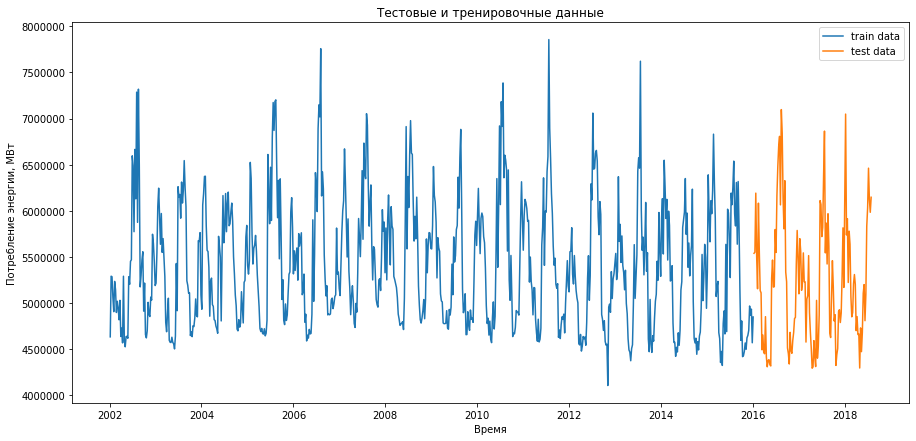

In [184]:
train, test = split_data( data_w.iloc[:-1,:], '01-06-2016')

plt.figure( figsize=( 15, 7 ))
plt.xlabel('Время')
plt.ylabel('Потребление энергии, МВт')
plt.plot(train.index.get_level_values('Date'),train['PJME_MW'], label='train data' )
plt.plot(test.index.get_level_values('Date'),test['PJME_MW'], label='test data')
plt.title( 'Тестовые и тренировочные данные' )
plt.legend()
plt.show()

In [185]:
X_train =X_new[:train.shape[0],:]
y_train =y[:train.shape[0],0]
X_test =X_new[train.shape[0]:-1,:]
y_test =y[train.shape[0]:-1,0]

In [186]:
model_g = GradientBoostingRegressor(max_depth=5, random_state=0, n_estimators=100)

In [187]:
model_g.fit( X_train, y_train ) 

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto', random_state=0,
                          subsample=1.0, tol=0.0001, validation_fraction=0.1,
                          verbose=0, warm_start=False)

In [188]:
y_test_pred_g = model_g.predict(X_test)

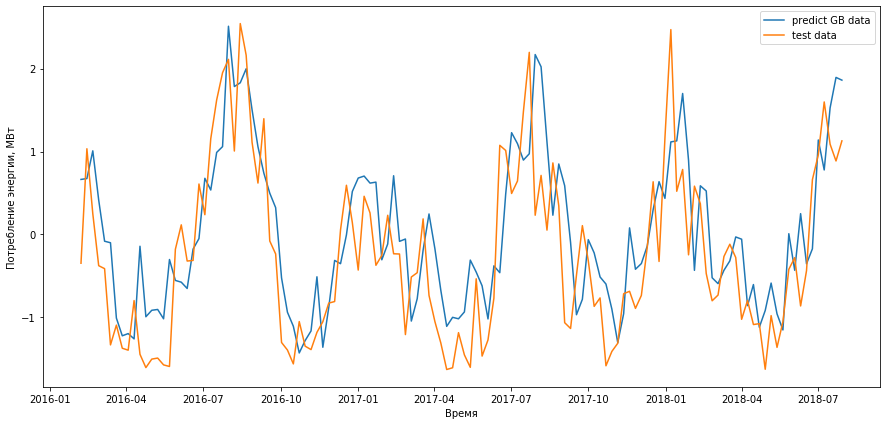

In [189]:

plt.figure( figsize=( 15, 7 ))


plt.xlabel('Время')
plt.ylabel('Потребление энергии, МВт')
plt.plot(test.index[h+p:],y_test_pred_g, label='predict GB data' )
plt.plot(test.index[h+p:],y_test, label='test data')

plt.legend()
plt.show()

In [190]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score


In [191]:
er_s = mean_squared_error(y_true=y_test, y_pred=y_test_pred_g) 
er_a = mean_absolute_error(y_true=y_test, y_pred=y_test_pred_g) 
er_r2 = r2_score(y_true=y_test, y_pred=y_test_pred_g)

print('ошибка mse :  ', er_s,'\nошибка mae  :  ', er_a,'\nоценка R2 :  ', er_r2)

ошибка mse :   0.4858074087202638 
ошибка mae  :   0.5852716781732117 
оценка R2 :   0.531592393759753


In [192]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [193]:
er_g = mean_absolute_percentage_error(y_true=scl_target.inverse_transform( y_test),y_pred = scl_target.inverse_transform( y_test_pred_g))

print('ошибка градиентного бустинга MAPE :  ', er_g,'%')

ошибка градиентного бустинга MAPE :   7.613457586589435 %


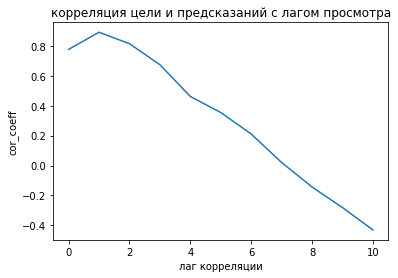

In [194]:
lag=10
p_cor=[np.corrcoef( y_test, y_test_pred_g)[1,0]]
for i in range(lag):
    c=np.corrcoef( y_test[:-(i+1)], y_test_pred_g[(i+1):])[1,0]
    p_cor.append(c)    

plt.plot(np.array(p_cor) )  
plt.xlabel('лаг корреляции')
plt.ylabel('cor_coeff')
plt.title('корреляция цели и предсказаний с лагом просмотра')
plt.show()

In [195]:
from sklearn.model_selection import RandomizedSearchCV

def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

param_dist = {"max_depth": [3, 2, 4, 6, 8, 10,14,5], 
              "n_estimators":[100,200,300,400,500, 750, 1000, 1200,1500]}

#  randomized search
n_iter_search = 25

model_gr =GradientBoostingRegressor()

random_search = RandomizedSearchCV(model_gr, param_distributions=param_dist, n_iter=n_iter_search, cv=5, iid=False)

random_search.fit(X_train, y_train)

report(random_search.cv_results_)

Model with rank: 1
Mean validation score: 0.656 (std: 0.046)
Parameters: {'n_estimators': 100, 'max_depth': 3}

Model with rank: 2
Mean validation score: 0.636 (std: 0.047)
Parameters: {'n_estimators': 200, 'max_depth': 2}

Model with rank: 3
Mean validation score: 0.607 (std: 0.074)
Parameters: {'n_estimators': 200, 'max_depth': 4}



In [197]:
model_g_best = GradientBoostingRegressor(max_depth=3,  n_estimators=100)
model_g_best.fit( X_train, y_train ) 
y_test_pred_g = model_g_best.predict(X_test)

er_g = mean_absolute_percentage_error(y_true=scl_target.inverse_transform( y_test),y_pred = scl_target.inverse_transform( y_test_pred_g))
print('ошибка градиентного бустинга MAPE :  ', er_g,'%')

ошибка градиентного бустинга MAPE :   7.2950693493542 %


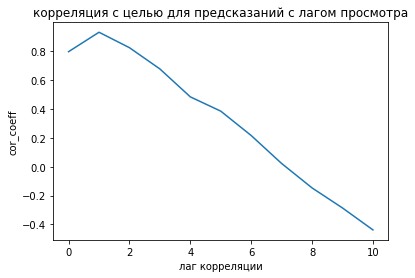

In [198]:
lag=10
p_cor=[np.corrcoef( y_test, y_test_pred_g)[1,0]]
for i in range(lag):
    c=np.corrcoef( y_test[:-(i+1)], y_test_pred_g[(i+1):])[1,0]
    p_cor.append(c)    

plt.plot(np.array(p_cor) )  
plt.xlabel('лаг корреляции')
plt.ylabel('cor_coeff')
plt.title('корреляция с целью для предсказаний с лагом просмотра')
plt.show()

## Глубина 4

In [259]:
scl_target_4=StandardScaler() 
p_4 = 3
h_4 =4
target_4 = data_w['PJME_MW'].values[h_4+p_4:].reshape((data_w.shape[0]-h_4-p_4,1))
y_4 = scl_target_4.fit_transform(target_4)
y_4.shape

(859, 1)

In [260]:
scl_x_4=StandardScaler() 

X_4 = data_w.iloc[p_4:-h_4,:].values
X_4 = scl_x_4.fit_transform(X_4.astype('float64'))
X_4.shape

(859, 22)

In [261]:
f_test_4, _ = f_regression(X_4, y_4.ravel())
f_test_4 /= np.max(f_test_4)
for i in range(X_4.shape[1]):
    print("F-test={:.2f},  I={}".format(f_test_4[i],i))

F-test=1.00,  I=0
F-test=0.02,  I=1
F-test=0.03,  I=2
F-test=0.00,  I=3
F-test=0.03,  I=4
F-test=0.03,  I=5
F-test=0.02,  I=6
F-test=0.43,  I=7
F-test=0.11,  I=8
F-test=0.00,  I=9
F-test=0.07,  I=10
F-test=0.05,  I=11
F-test=0.02,  I=12
F-test=0.15,  I=13
F-test=0.18,  I=14
F-test=0.18,  I=15
F-test=0.00,  I=16
F-test=0.03,  I=17
F-test=0.06,  I=18
F-test=0.09,  I=19
F-test=0.09,  I=20
F-test=0.08,  I=21


In [262]:
sfk =SelectKBest(f_regression, k=7)
X_new1 =sfk.fit_transform(X_4, y_4.ravel())
X_new1.shape

(859, 7)

In [263]:
column_names = data_w.columns[sfk.get_support()]
column_names

Index(['PJME_MW', 't', 't1', 'pca2', 'diff1', 'diff1_d', 'exp_0_06'], dtype='object')

In [264]:
list_param_k =np.where(sfk.get_support())[0]


print('Номера признаков k лучших признаков : ',list_param_k)

Номера признаков k лучших признаков :  [ 0  7  8 13 14 15 19]


In [265]:
list_par_4=[0,7, 8, 13, 14, 15, 19]
X_new_4 = X_4[:,list_par_4]
data_w.columns[list_par_4]

Index(['PJME_MW', 't', 't1', 'pca2', 'diff1', 'diff1_d', 'exp_0_06'], dtype='object')

In [266]:
X_train_4 =X_new_4[:train.shape[0],:]
y_train_4 =y_4[:train.shape[0],0]
X_test_4 =X_new_4[train.shape[0]:-1,:]
y_test_4 =y_4[train.shape[0]:-1,0]

In [267]:
from sklearn.model_selection import RandomizedSearchCV

def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

param_dist = {"max_depth": [3, 2, 4, 6, 8, 10,14,5], 
              "n_estimators":[100,200,300,400,500, 750, 1000, 1200,1500]}

#  randomized search
n_iter_search = 25

model_gr_4 =GradientBoostingRegressor()

random_search = RandomizedSearchCV(model_gr, param_distributions=param_dist, n_iter=n_iter_search, cv=5, iid=False)

random_search.fit(X_train_4, y_train_4)

report(random_search.cv_results_)

Model with rank: 1
Mean validation score: 0.307 (std: 0.060)
Parameters: {'n_estimators': 100, 'max_depth': 2}

Model with rank: 2
Mean validation score: 0.277 (std: 0.079)
Parameters: {'n_estimators': 200, 'max_depth': 2}

Model with rank: 3
Mean validation score: 0.276 (std: 0.078)
Parameters: {'n_estimators': 100, 'max_depth': 3}



In [268]:
model_g_best_4 = GradientBoostingRegressor(max_depth=2,  n_estimators=100)
model_g_best_4.fit( X_train_4, y_train_4 ) 
y_test_pred_g_4 = model_g_best_4.predict(X_test_4)

er_g = mean_absolute_percentage_error(y_true=scl_target_4.inverse_transform( y_test_4),y_pred = scl_target_4.inverse_transform( y_test_pred_g_4))
print('ошибка градиентного бустинга MAPE :  ', er_g,'%')

ошибка градиентного бустинга MAPE :   11.740925716889198 %


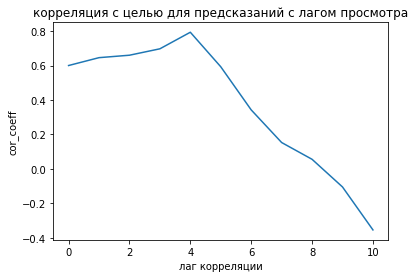

In [269]:
lag=10
p_cor=[np.corrcoef( y_test_4, y_test_pred_g_4)[1,0]]
for i in range(lag):
    c=np.corrcoef( y_test_4[:-(i+1)], y_test_pred_g_4[(i+1):])[1,0]
    p_cor.append(c)    

plt.plot(np.array(p_cor) )  
plt.xlabel('лаг корреляции')
plt.ylabel('cor_coeff')
plt.title('корреляция с целью для предсказаний с лагом просмотра')
plt.show()

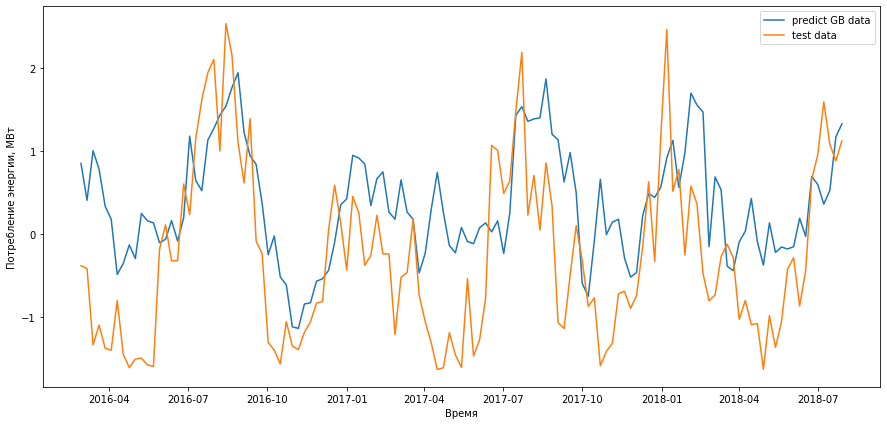

In [270]:

plt.figure( figsize=( 15, 7 ))


plt.xlabel('Время')
plt.ylabel('Потребление энергии, МВт')
plt.plot(test.index[h_4+p_4:],y_test_pred_g_4, label='predict GB data' )
plt.plot(test.index[h_4+p_4:],y_test_4, label='test data')

plt.legend()
plt.show()

In [287]:
#['PJME_MW', 't', 't1', 'pca2', 'diff1', 'diff1_d', 'exp_0_06']
X_test_100 = X_test_4.copy()
y_test_100 = y_test_4.copy()
N10 = 100+p
for i in range(p,N10+p):
    y_test_100[i] = model_g_best.predict(X_test_100[i,:].reshape((1,X_test_100.shape[1])))
    # восстанавливаем не масштабированное значение ряда текущей точке  
    y_i=scl_target_4.inverse_transform(y_test_100[i:i+1]  )
                                     
    # заполняем вектор для прогноза следующей точки
    X_test_100[i+1,0] = (y_i-scl_x_4.mean_[0])/scl_x_4.scale_[0]
    X_test_100[i+1,1] = X_test_100[i,0]
    X_test_100[i+1,2] = X_test_100[i-1,0]

    X_test_100[i+1,3] = X_test_100[i+1,0]- X_test_100[i,0]   
    #X_test_100[i+1,4] = X_test_100[i+1,3] / scl_x_4.scale_[4]
    #строим 'exp_0_07', 'exp_0_08'
    X_test_100[i+1,4] = X_test_100[i,4]*(1-0.06)+ 0.06 * X_test_100[i+1,0] 


X_test_100
  

array([[ 1.75214123e-01,  1.20531187e+00,  2.48950764e-01,
        -4.34955987e-01, -1.59094152e+00, -1.60693052e+00,
        -7.91503605e-01],
       [-3.46826862e-01,  1.77524905e-01,  1.20725390e+00,
        -3.45680156e-01, -8.10843943e-01, -8.56907855e-01,
        -8.03231141e-01],
       [ 1.03895599e+00, -3.45295187e-01,  1.78914917e-01,
        -1.31011344e-01,  2.14085445e+00,  2.04116306e+00,
        -5.67715616e-01],
       [ 2.53206860e-01,  1.04255584e+00, -3.44185978e-01,
        -1.22102124e-01, -1.21884121e+00, -1.21032998e+00,
        -4.86120691e-01],
       [ 3.94282213e-01,  2.53206860e-01,  1.03895599e+00,
         1.41075353e-01, -1.12205380e+00, -1.04511849e+00,
        -5.21460609e-01],
       [ 7.57307716e-01,  3.94282213e-01,  2.53206860e-01,
         3.63025502e-01, -1.00929211e+00, -2.68107308e-02,
        -5.61057331e-01],
       [ 8.62100695e-01,  7.57307716e-01,  3.94282213e-01,
         1.04792979e-01, -8.97008545e-01, -1.77399796e+00,
        -7.6245784

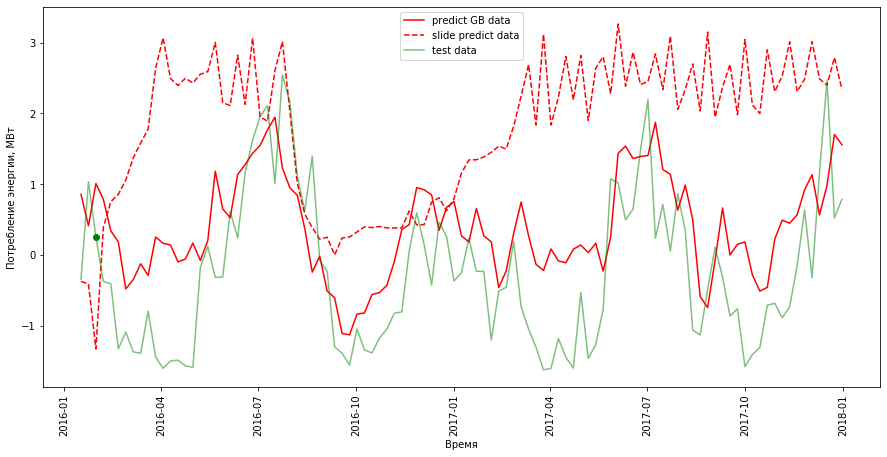

In [288]:
plt.figure( figsize=( 15, 7 ))


plt.xlabel('Время')
plt.ylabel('Потребление энергии, МВт')
plt.plot(test.index[1:N10+1],y_test_pred_g_4[:N10], 'r',label='predict GB data' )
plt.plot(test.index[1:N10+1],y_test_100[:N10], '--r',label='slide predict data')
plt.plot(test.index[1:N10+1],y_test[:N10], 'g',label='test data', alpha=0.5)
plt.plot(test.index[p],y_test[p-1], 'og', alpha=1)
plt.xticks(rotation='90')
plt.legend()
plt.show()  

In [289]:
er_g = mean_absolute_percentage_error(y_true=scl_target_4.inverse_transform( y_test_4[p:N10]),y_pred = scl_target_4.inverse_transform( y_test_100[p:N10]))
print('ошибка градиентного бустинга MAPE :  ', er_g,'%')

ошибка градиентного бустинга MAPE :   29.196621620606905 %


In [291]:
for pp in range(0, 15):
    er_g = mean_absolute_percentage_error(y_true=scl_target_4.inverse_transform( y_test_4[pp*3:(pp+1)*3]),y_pred = scl_target_4.inverse_transform( y_test_100[pp*3:(pp+1)*3]))
    print(f'ошибка градиентного бустинга MAPE для [{3*pp}:{3*(pp+1)}] : {er_g}%')

ошибка градиентного бустинга MAPE для [0:3] : 0.0%
ошибка градиентного бустинга MAPE для [3:6] : 29.1677097708537%
ошибка градиентного бустинга MAPE для [6:9] : 39.48640647408961%
ошибка градиентного бустинга MAPE для [9:12] : 61.984184514881356%
ошибка градиентного бустинга MAPE для [12:15] : 41.97985554180215%
ошибка градиентного бустинга MAPE для [15:18] : 32.060104855975055%
ошибка градиентного бустинга MAPE для [18:21] : 16.536665403823697%
ошибка градиентного бустинга MAPE для [21:24] : 10.63988249725912%
ошибка градиентного бустинга MAPE для [24:27] : 8.199203482201192%
ошибка градиентного бустинга MAPE для [27:30] : 16.114537664045393%
ошибка градиентного бустинга MAPE для [30:33] : 20.021832770616374%
ошибка градиентного бустинга MAPE для [33:36] : 22.307567621589676%
ошибка градиентного бустинга MAPE для [36:39] : 22.542638554466354%
ошибка градиентного бустинга MAPE для [39:42] : 12.579005303373853%
ошибка градиентного бустинга MAPE для [42:45] : 6.406314243916336%
